In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tempdata = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
tempdata.head(5)

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [4]:
tempdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


### Data Cleaning

In [5]:
print(tempdata.isnull().sum())

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [6]:
cleaned_teamdata = tempdata.dropna()

In [7]:
print(cleaned_teamdata.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


### Extracting Bangladesh Data

In [8]:
cleaned_teamdata['Country'].value_counts()

Country
India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: count, Length: 159, dtype: int64

In [9]:
# Extract data for the Bangladesh
df_bd = cleaned_teamdata[cleaned_teamdata['Country'] == 'Bangladesh']

# Set 'dt' as the datetime index
df_bd.index = pd.to_datetime(df_bd['dt'])

df_bd = df_bd.sort_index()

# Drop 'dt' and 'AverageTemperatureUncertainty' columns
df_bd = df_bd.drop(['dt', 'AverageTemperatureUncertainty'], axis=1)

# Display the first few rows
df_bd.head()

AverageTemperature           City     Country Latitude Longitude
dt                                                                          
1796-01-01              18.476        Barisal  Bangladesh   23.31N    90.00E
1796-01-01              18.476    Narayanganj  Bangladesh   23.31N    90.00E
1796-01-01              18.476      Narsingdi  Bangladesh   23.31N    90.00E
1796-01-01              18.476          Tungi  Bangladesh   23.31N    90.00E
1796-01-01              17.668  Bhairab Bazar  Bangladesh   24.92N    90.44E

In [10]:
df_bd.describe()

AverageTemperature
count        48055.000000
mean            25.052512
std              4.125693
min             10.953000
25%             21.715000
50%             26.705000
75%             28.438000
max             32.815000

In [11]:
df_bd_ts = df_bd['AverageTemperature']

In [12]:
grouped_df_bd_ts = df_bd_ts.groupby(df_bd_ts.index).mean()

In [13]:
grouped_df_bd_ts.head()

dt
1796-01-01    17.921158
1796-02-01    20.386737
1796-03-01    23.667263
1796-04-01    27.431526
1796-05-01    28.825474
Name: AverageTemperature, dtype: float64

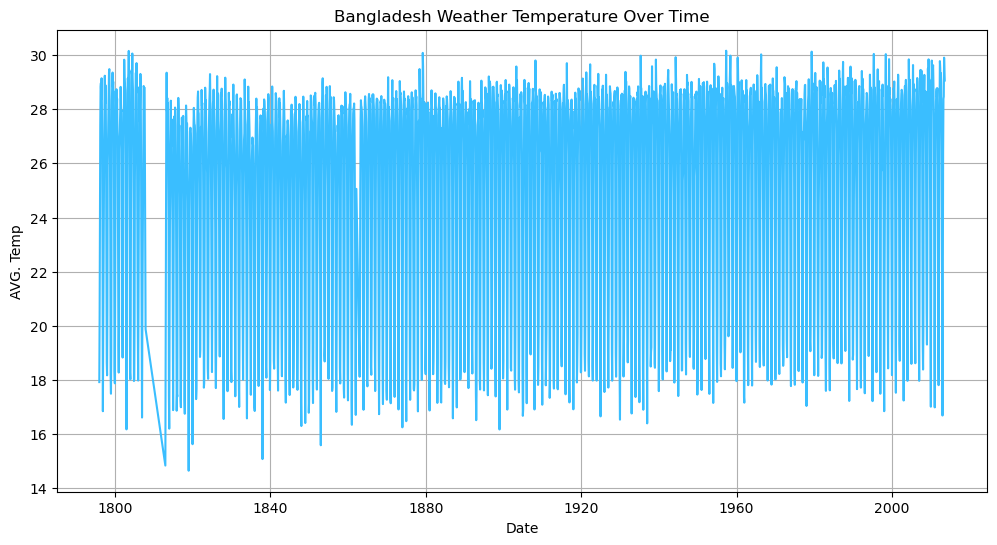

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df_bd_ts, color='#3ABEFF')
plt.title('Bangladesh Weather Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('AVG. Temp')
#plt.legend()
plt.grid(True)
plt.show()

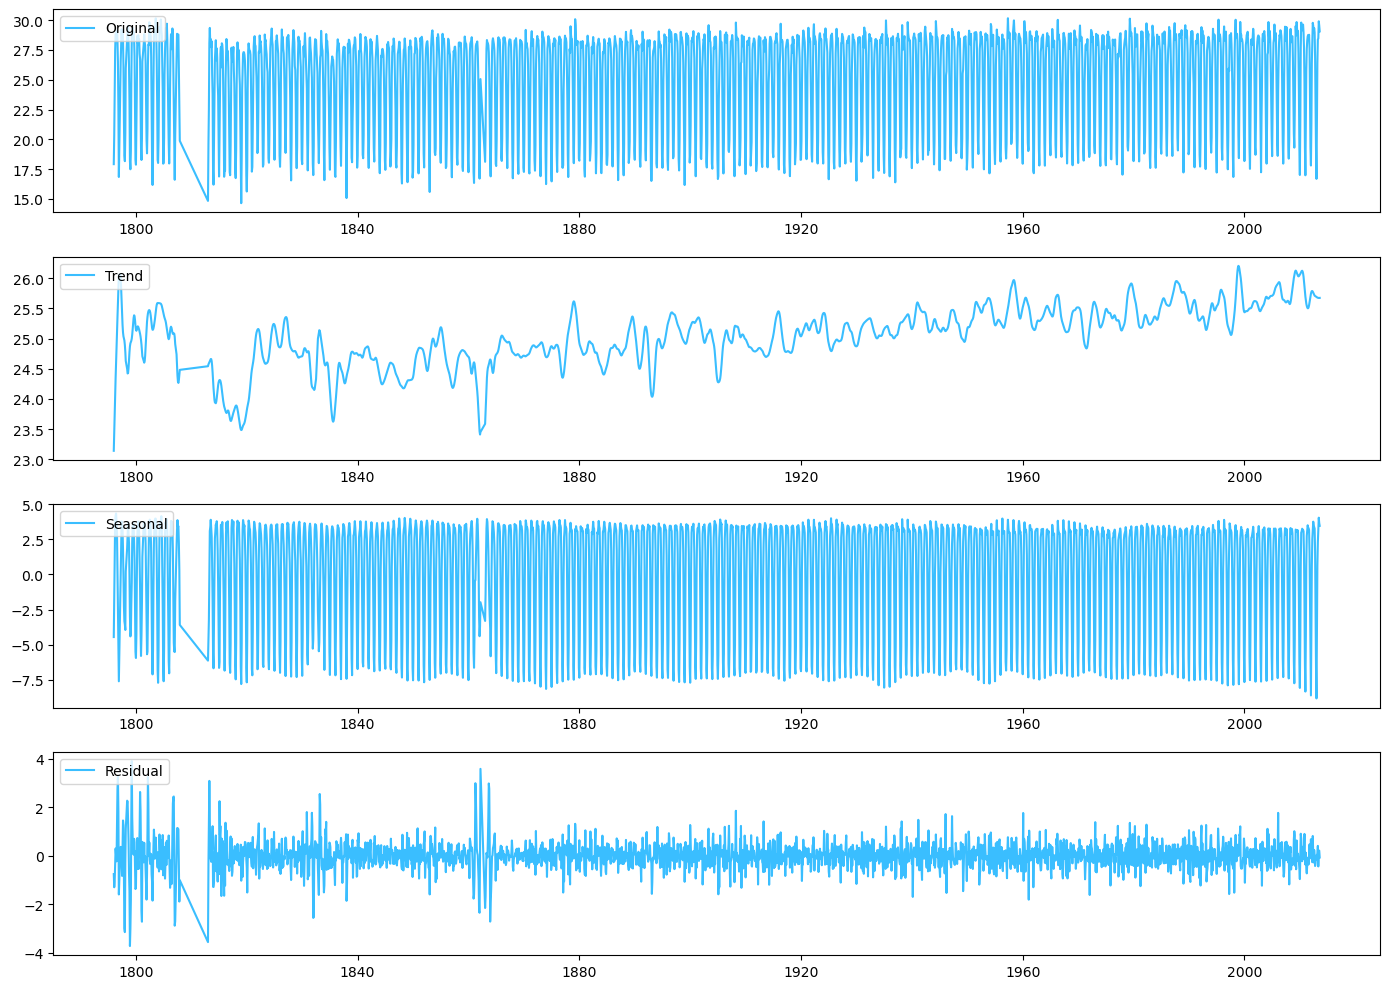

In [15]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(grouped_df_bd_ts, period=12)
result = stl.fit()

# Plot the decomposition components
plt.figure(figsize=(14, 10))

# Original Data
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#3ABEFF')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#3ABEFF')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#3ABEFF')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#3ABEFF')
plt.legend(loc='upper left')

# Adjust layout and show
plt.tight_layout()
plt.show()

In [16]:
# Import necessary libraries
from statsmodels.tsa.stattools import adfuller, kpss

def perform_adf_test(data, significance_level):
    """
    Perform the Augmented Dickey-Fuller (ADF) test and interpret the results.
    
    Parameters:
        data (pd.Series): The time series data (no column name required).
        significance_level (float): The significance level for the test (default is 0.05).
    
    Returns:
        None: Prints the results and interpretation of the ADF test.
    """
    # Ensure data is a pandas Series
    if not isinstance(data, pd.Series):
        raise ValueError("Input data must be a pandas Series.")
    
    # Perform the ADF test
    adf_test = adfuller(data)
    
    # Print ADF test results
    print('ADF Test Results:')
    print(f"ADF Statistic: {round(adf_test[0], 3)}")
    print(f"p-value: {round(adf_test[1], 3)}")
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f"   {key}: {round(value, 3)}")
    
    # Interpretation based on p-value
    if adf_test[1] > significance_level:
        print(f"\nConclusion: Fail to reject H0. The data has a unit root (non-stationary).")
    else:
        print(f"\nConclusion: Reject H0. The data is stationary.")
    
    # Comparison with critical value at the chosen significance level
    critical_value = adf_test[4][f'{int(significance_level * 100)}%']  # Using significance level for comparison
    if adf_test[0] < critical_value:
        print(f"The ADF Statistic is less than the critical value. Reject H0. The data is stationary.")
    else:
        print(f"The ADF Statistic is greater than the critical value. Fail to reject H0. The data is non-stationary.")

In [17]:
perform_adf_test(grouped_df_bd_ts,0.05)

ADF Test Results:
ADF Statistic: -4.318
p-value: 0.0
Critical Values:
   1%: -3.433
   5%: -2.863
   10%: -2.567

Conclusion: Reject H0. The data is stationary.
The ADF Statistic is less than the critical value. Reject H0. The data is stationary.


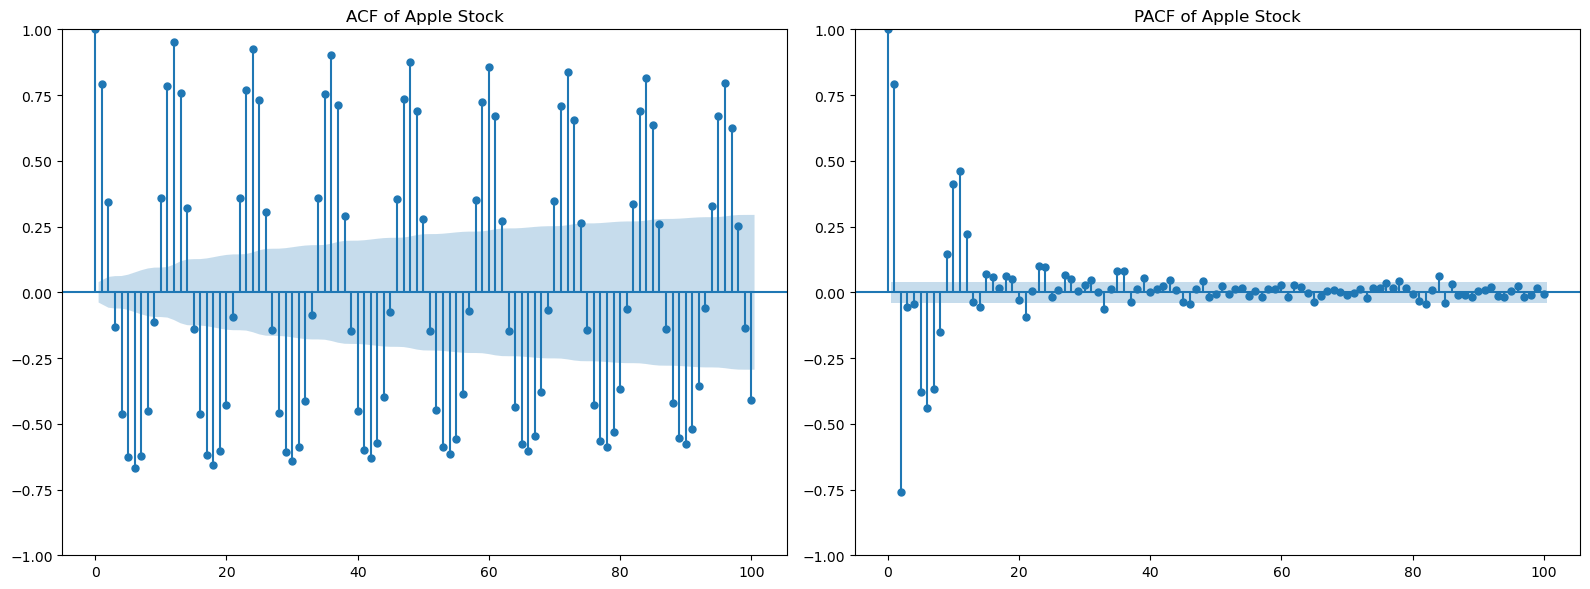

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(16,6))

# ACF Plot
plt.subplot(1,2,1)
plot_acf(grouped_df_bd_ts, ax=plt.gca(), lags=100)
plt.title('ACF of Apple Stock')

# ACF Plot
plt.subplot(1,2,2)
plot_pacf(grouped_df_bd_ts, ax=plt.gca(), lags=100)
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model_performance(test_data, predictions, model=None):
    """
    Evaluates the performance of a model using various metrics.

    Parameters:
        test_data (array-like): Actual test data values.
        predictions (array-like): Predicted values from the model.
        model_fit (object, optional): A fitted model object with AIC and BIC attributes.

    Returns:
        dict: A dictionary containing the calculated metrics.
    """
    # 1. Mean Absolute Error (MAE)
    mae = mean_absolute_error(test_data, predictions)
    
    # 2. Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, predictions)
    
    # 3. Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # 4. Mean Absolute Percentage Error (MAPE)
    y_true, y_pred = np.array(test_data), np.array(predictions)

    # 5. Mean value of Test Data 
    test_data_mean = test_data.mean()

    # 6. Error Percentage
    error_percentage = (mse/test_data_mean)*100

    # Define a small value threshold to avoid division by zero or very small values
    #small_value_threshold = 1e-8

    # Replace 0 or small values in y_true with the small constant
    #y_true = np.where(np.abs(y_true) < small_value_threshold, small_value_threshold, y_true)

    # Handle negative values by using the absolute value for percentage error
    #y_true_abs = np.abs(y_true)  # Use absolute values to avoid issues with negative values
   # y_pred_abs = np.abs(y_pred)  # Similarly, use absolute values for predictions

    # Compute MAPE based on absolute values
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Initialize a dictionary for results
    metrics = {
        'Mean Absolute Error (MAE)': round(mae,3),
        'Mean Squared Error (MSE)': round(mse,3),
        'Root Mean Squared Error (RMSE)': round(rmse,3),
        'Mean Absolute Percentage Error (MAPE)': round(mape,3),
        'Mean value of test data': round(test_data_mean,3),
        'Error Percentage': round(error_percentage,3)
    }

    # Add AIC and BIC if model_fit is provided
    if model:
        metrics['Akaike Information Criterion (AIC)'] = round(model.aic,3)
        metrics['Bayesian Information Criterion (BIC)'] = round(model.bic,3)

    # Print the metrics
    for metric, value in metrics.items():
        print(f'{metric}: {value}')

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model = ARIMA(grouped_df_bd_ts,order=(2,0,20))
ARMA_model = model.fit()

ARMA_prediction = ARMA_model.predict(start= '1990-01-01', end = '1991-01-01')

C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [22]:
# Ensure the index is datetime and then slice by date range
actuals = grouped_df_bd_ts.loc['1990-01-01':'1991-01-01']

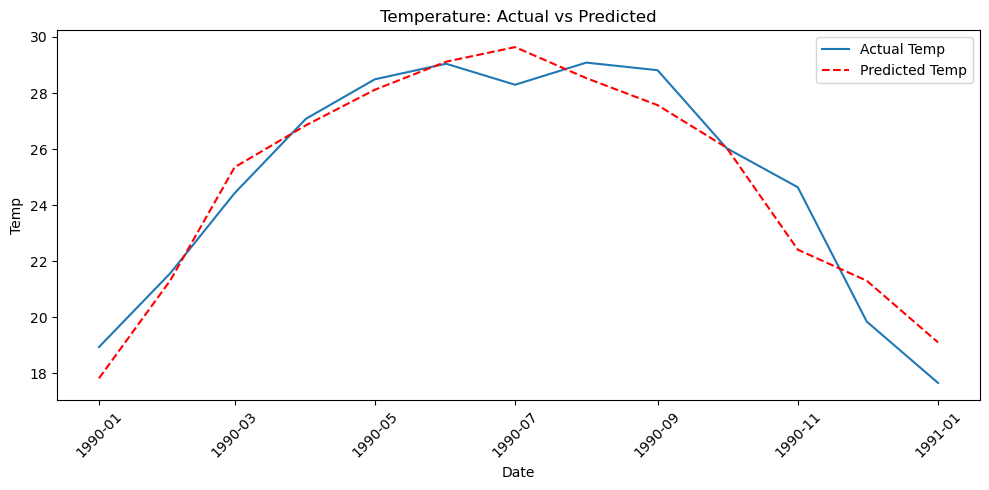

In [23]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(actuals.index, actuals, label='Actual Temp')
plt.plot(ARMA_prediction.index, ARMA_prediction, color='red', linestyle='--', label='Predicted Temp')
plt.title('Temperature: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [24]:
evaluate_model_performance(actuals,ARMA_prediction,ARMA_model)

Mean Absolute Error (MAE): 0.866
Mean Squared Error (MSE): 1.168
Root Mean Squared Error (RMSE): 1.081
Mean Absolute Percentage Error (MAPE): 3.76
Mean value of test data: 24.918
Error Percentage: 4.689
Akaike Information Criterion (AIC): 7334.54
Bayesian Information Criterion (BIC): 7474.622


In [25]:
train_data, test_data = grouped_df_bd_ts.iloc[:-304], grouped_df_bd_ts.iloc[-304:]

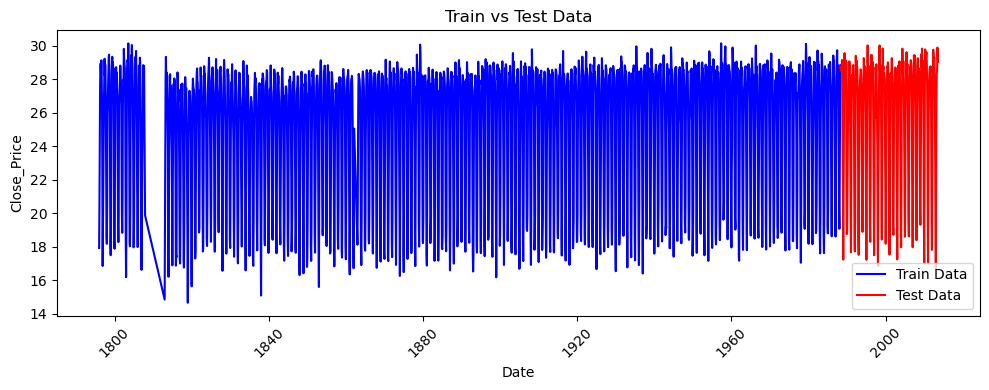

In [26]:
import matplotlib.dates as mdates

# Assuming your train_data and test_data have datetime indices
plt.figure(figsize=(10, 4))

# Plot the training data with dot style
plt.plot(train_data, label='Train Data', color='blue')

# Plot the testing data with dot style
plt.plot(test_data, label='Test Data', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close_Price')  # Replace 'Close_Price' if necessary
plt.title('Train vs Test Data')

# Add a legend to distinguish between the two
plt.legend()

# Set x-axis major locator to every month and format the date labels
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locator for every month
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  # Format as Month Year

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

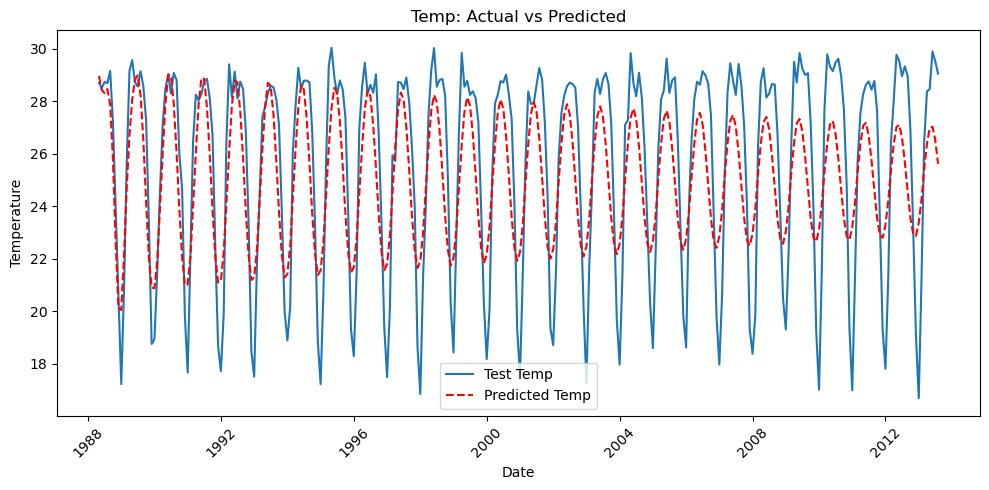

In [27]:
# Fit the Autoregressive model (AR) to the training data
model = ARIMA(train_data, order=(2, 0, 20))
ARMA_model2 = model.fit()

# Make predictions on the test data
#ARMA_predictions = ARMA_model2.predict(start= '2012-05-01', end = "2013-08-01")
ARMA_predictions = ARMA_model2.predict(start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test Temp')
plt.plot(test_data.index, ARMA_predictions, color='red', linestyle='--', label='Predicted Temp')
plt.title('Temp: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [28]:
evaluate_model_performance(test_data,ARMA_predictions,ARMA_model2)

Mean Absolute Error (MAE): 2.076
Mean Squared Error (MSE): 6.018
Root Mean Squared Error (RMSE): 2.453
Mean Absolute Percentage Error (MAPE): 8.658
Mean value of test data: 25.67
Error Percentage: 23.443
Akaike Information Criterion (AIC): 6475.293
Bayesian Information Criterion (BIC): 6612.306


In [29]:
ARMA_predictions

2228    28.969476
2229    28.438102
2230    28.320985
2231    28.472507
2232    27.880918
          ...    
2527    26.380610
2528    26.981418
2529    27.038889
2530    26.540235
2531    25.622341
Name: predicted_mean, Length: 304, dtype: float64

In [30]:
# Define start and end points for predictions
start = len(train_data) + len(test_data)  # Prediction starts immediately after test data
end = start + 30  # Predict for 31 days

# Generate ARMA future predictions
ARMA_future_predictions = ARMA_model2.predict(
    start=start,
    end=end,
    dynamic=False
)

# Ensure ARMA_future_predictions index matches the date range
prediction_index = pd.date_range(
    start=df_bd_ts.index[-1] + pd.Timedelta(days=1),  # Start after the last known date
    periods=31,  # Number of days to predict
    freq='D'  # Daily frequency
)

# Assign the new index to the predictions
ARMA_future_predictions.index = prediction_index

print(ARMA_future_predictions)

2013-08-02    24.534197
2013-08-03    23.569369
2013-08-04    22.986804
2013-08-05    22.941338
2013-08-06    23.442559
2013-08-07    24.352940
2013-08-08    25.425560
2013-08-09    26.371069
2013-08-10    26.935736
2013-08-11    26.969533
2013-08-12    26.465979
2013-08-13    25.563185
2013-08-14    24.505981
2013-08-15    23.579531
2013-08-16    23.032421
2013-08-17    23.009964
2013-08-18    23.515620
2013-08-19    24.410758
2013-08-20    25.452657
2013-08-21    26.360307
2013-08-22    26.890197
2013-08-23    26.901637
2013-08-24    26.394103
2013-08-25    25.506684
2013-08-26    24.479978
2013-08-27    23.590872
2013-08-28    23.077871
2013-08-29    23.077129
2013-08-30    23.586323
2013-08-31    24.465963
2013-09-01    25.477589
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Sougata Biswas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
from pmdarima import auto_arima
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Fit the auto ARIMA model
stepwise_fit = auto_arima(df_bd_ts,max_p=3,max_q=30,max_d=1, 
                          trace=True, 
                          suppress_warnings=True)

# Display model summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=168782.970, Time=3.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=182865.380, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=172856.499, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=168777.471, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=182863.381, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=168779.073, Time=3.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=168779.071, Time=2.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=168781.360, Time=2.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=168775.478, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=168777.081, Time=1.76 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=168777.078, Time=1.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=172854.501, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=168779.367, Time=1.51 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 23.134 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                48055
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -84385.739
Date:                Wed, 01 Jan 2025   AIC                         168775.478
Time:                        23:29:41   BIC                         168793.038
Sample:                             0   HQIC                        168780.989
                              - 48055                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5854      0.003   -208.392      0.000      -0.591      -0.580
sigma2         1.9625      0.007    282.255      0.000       1.949       1.976
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             49266.31
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.89
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [34]:
bd_ts = pd.DataFrame(grouped_df_bd_ts)
bd_ts = bd_ts.reset_index()

In [35]:
bd_ts.columns = ['ds','y']

In [36]:
ph_train_data, ph_test_data = bd_ts.iloc[:-304], bd_ts.iloc[-304:]

In [37]:
m=Prophet()
m.fit(ph_train_data)
future =m.make_future_dataframe(periods=304,freq='M')
forecast = m.predict(future)

23:29:46 - cmdstanpy - INFO - Chain [1] start processing
23:29:46 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2527 2013-03-31  28.285547   27.412446   29.170326
2528 2013-04-30  29.061536   28.163059   29.956813
2529 2013-05-31  29.012682   28.089020   29.856648
2530 2013-06-30  28.889175   27.999251   29.835239
2531 2013-07-31  28.926577   28.031707   29.832729

In [39]:
plot_plotly(m,forecast)

In [40]:
plot_components_plotly(m,forecast)

In [41]:
evaluate_model_performance(ph_test_data['y'],forecast.iloc[-304:]['yhat'])

Mean Absolute Error (MAE): 0.544
Mean Squared Error (MSE): 0.509
Root Mean Squared Error (RMSE): 0.713
Mean Absolute Percentage Error (MAPE): 2.238
Mean value of test data: 25.67
Error Percentage: 1.981


evaluate_model_performance(test_data,SARIMA_predictions,SARIMA_model)